Kuriu ir testuoju funkciją, nustatančią mėnulio fazę.

# pip install ephem --break-system-packages

In [ ]:
import ephem

def get_moon_phase_usa(date=None):
    moon = ephem.Moon()
    moon.compute(date)
    phase = moon.phase
    return phase

# Naudojimas:

date = datetime.now().strftime("%Y/%m/%d")  # Data 'YYYY/MM/DD'
print(f"Mėnulio fazė {date}: {get_moon_phase_usa(date):3.0f}% (Dabar)")

date = '2008/08/01'  # Jaunatis
print(f"Mėnulio fazė {date}: {get_moon_phase_usa(date):3.0f}% (Jaunatis)")

date = '2001/11/01'  # Pilnatis
print(f"Mėnulio fazė {date}: {get_moon_phase_usa(date):3.0f}% (Pilnatis)")


Mėnulio fazė 2025/02/06:  58% (Dabar)
Mėnulio fazė 2008/08/01:   0% (Jaunatis)
Mėnulio fazė 2001/11/01: 100% (Pilnatis)


In [19]:
from datetime import datetime
print(datetime.now().strftime("%Y/%m/%d"))

2025/02/06


In [3]:
from dateutil import parser
import ephem

def get_moon_phase_iso(iso_date=None):
    # Konvertuojama ISO data į datetime objektą
    date = parser.parse(iso_date)
    # Sukuriama `ephem` mėnulio objektas
    moon = ephem.Moon()
    # Data pateikiama `ephem` suprantamu formatu
    moon.compute(date)
    phase = moon.phase
    return phase

# Naudojimas:
date = '2025-02-05'  # Data
print(f"Mėnulio fazė {date}: {get_moon_phase_iso(date):2.0f}%")

date = '2001-11-01'  # Pilnatis
print(f"Mėnulio fazė {date}: {get_moon_phase_iso(date):3.0f}% (Pilnatis)")

date = '2008-08-01'  # Jaunatis
print(f"Mėnulio fazė {date}: {get_moon_phase_iso(date):3.0f}% (Jaunatis)")


Mėnulio fazė 2025-02-05: 46%
Mėnulio fazė 2001-11-01: 100% (Pilnatis)
Mėnulio fazė 2008-08-01:   0% (Jaunatis)


In [4]:
from dateutil import parser
import ephem
from datetime import datetime

def get_moon_phase_iso2(iso_date=None):
    # Jei data nenurodyta, naudojama šiandienos data
    if not iso_date:
        date = datetime.now()
        # iso_date.replace(hour=0, minute=0, second=0, microsecond=0)
    else:
        # Konvertuojama ISO data į datetime objektą
        date = parser.parse(iso_date)

    # Sukuriama `ephem` mėnulio objektas
    moon = ephem.Moon()
    # Data pateikiama `ephem` suprantamu formatu
    moon.compute(date)
    phase = moon.phase
    # print(f"({date}, {phase})")
    return phase

# Naudojimas:
print(f"Mėnulio fazė šiuo metu: {get_moon_phase_iso2():3.0f}%")

date = '2025-02-05 19:27'  # Data
print(f"Mėnulio fazė {date}: {get_moon_phase_iso2(date):3.0f}%")

date = '2001-11-01'  # Pilnatis
print(f"Mėnulio fazė {date}: {get_moon_phase_iso2(date):3.0f}% (Pilnatis)")

date = '2008-08-01'  # Jaunatis
print(f"Mėnulio fazė {date}: {get_moon_phase_iso2(date):3.0f}% (Jaunatis)")

Mėnulio fazė šiuo metu:  66%
Mėnulio fazė 2025-02-05 19:27:  55%
Mėnulio fazė 2001-11-01: 100% (Pilnatis)
Mėnulio fazė 2008-08-01:   0% (Jaunatis)


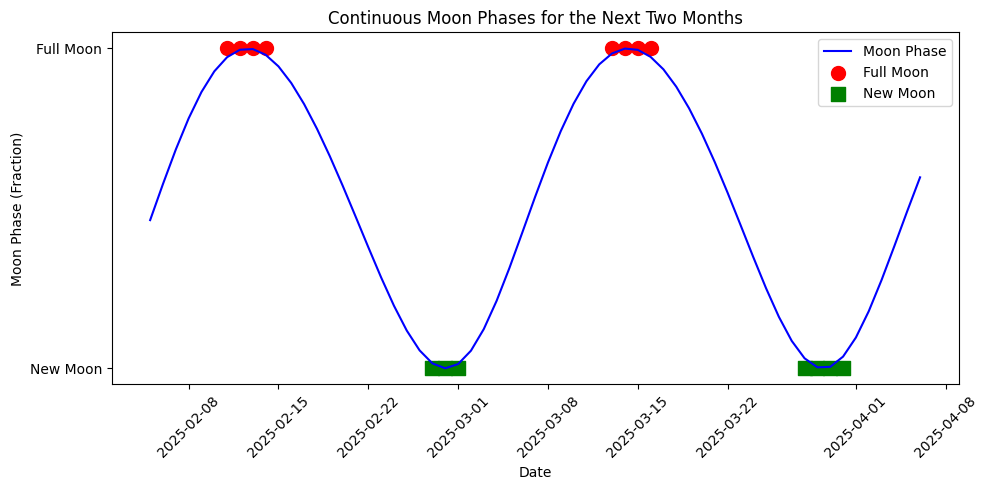

In [5]:
import ephem
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Moon phase as a fraction using ephem
def moon_phase_fraction(date: datetime) -> float:
    """
    Returns the moon phase as a fraction (0 to 1) for a given date using ephem.
    
    Parameters:
    date (datetime): The date for which the moon phase is determined.
    
    Returns:
    float: A fraction representing the moon phase (0 - New Moon, 1 - Full Moon).
    """
    # Convert datetime to ephem date
    obs_date = ephem.Date(date)
    moon = ephem.Moon(obs_date)
    
    # plot_moon_phases_fractionReturn the moon phase fraction
    return moon.phase / 100  # Convert phase percentage to a fraction (0-1)

# Plotting the continuous moon phases for the next two months with fractions
def plot_moon_phases_fraction(start_date: datetime) -> None:
    """
    Plots the continuous moon phases for the next two months as a fraction.
    
    Parameters:
    start_date (datetime): The starting date for the moon phase generation.
    """
    end_date = start_date + timedelta(days=60)  # Next two months
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Getting moon phase values as fractions
    moon_phases = [moon_phase_fraction(date) for date in dates]
    
    # Plotting the continuous moon phase values
    plt.figure(figsize=(10, 5))
    plt.plot(dates, moon_phases, color='b', linestyle='-', marker='', label="Moon Phase")
    
    # Marking the Full Moon and New Moon with distinct symbols
    full_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase >= 0.95]
    new_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase <= 0.05]
    
    plt.scatter(full_moon_dates, [1]*len(full_moon_dates), color='r', marker='o', s=100, label="Full Moon")
    plt.scatter(new_moon_dates, [0]*len(new_moon_dates), color='g', marker='s', s=100, label="New Moon")
    
    plt.yticks([0, 1], ['New Moon', 'Full Moon'])
    plt.xlabel('Date')
    plt.ylabel('Moon Phase (Fraction)')
    plt.title('Continuous Moon Phases for the Next Two Months')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the moon phases starting from today at midnight
plot_moon_phases_fraction(datetime(2025, 2, 5))

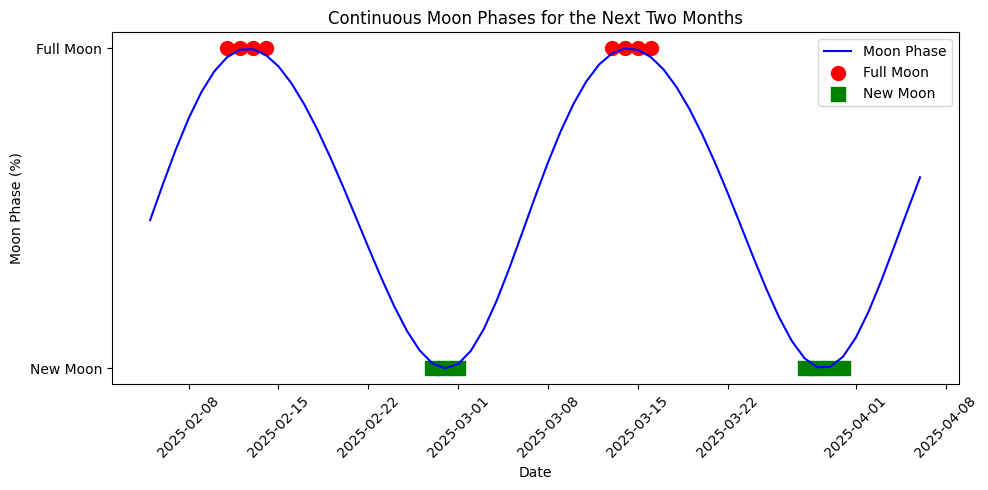

In [6]:
import ephem
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Updated function to get moon phase as a percentage using ephem
def moon_phase_percentage(date: datetime) -> float:
    """
    Returns the moon phase as a percentage (0 to 100) for a given date using ephem.
    
    Parameters:
    date (datetime): The date for which the moon phase is determined.
    
    Returns:
    float: A percentage representing the moon phase (0 - New Moon, 100 - Full Moon).
    """
    # Convert datetime to ephem date
    obs_date = ephem.Date(date)
    moon = ephem.Moon(obs_date)
    
    # Return the moon phase percentage
    return moon.phase  # Return phase as percentage (0-100)

# Plotting the continuous moon phases for the next two months as percentages
def plot_moon_phases_percentage(start_date: datetime) -> None:
    """
    Plots the continuous moon phases for the next two months as a percentage.
    
    Parameters:
    start_date (datetime): The starting date for the moon phase generation.
    """
    end_date = start_date + timedelta(days=60)  # Next two months
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Getting moon phase values as percentages
    moon_phases = [moon_phase_percentage(date) for date in dates]
    
    # Plotting the continuous moon phase values
    plt.figure(figsize=(10, 5))
    plt.plot(dates, moon_phases, color='b', linestyle='-', marker='', label="Moon Phase")
    
    # Marking the Full Moon and New Moon with markers on the curve
    full_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase >= 95]  # Near Full Moon
    new_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase <= 5]  # Near New Moon
    
    # Marking Full Moon and New Moon
    plt.scatter(full_moon_dates, [100]*len(full_moon_dates), color='r', marker='o', s=100, label="Full Moon")
    plt.scatter(new_moon_dates, [0]*len(new_moon_dates), color='g', marker='s', s=100, label="New Moon")
    
    plt.yticks([0, 100], ['New Moon', 'Full Moon'])
    plt.xlabel('Date')
    plt.ylabel('Moon Phase (%)')
    plt.title('Continuous Moon Phases for the Next Two Months')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the moon phases starting from today at midnight
plot_moon_phases_percentage(datetime(2025, 2, 5))


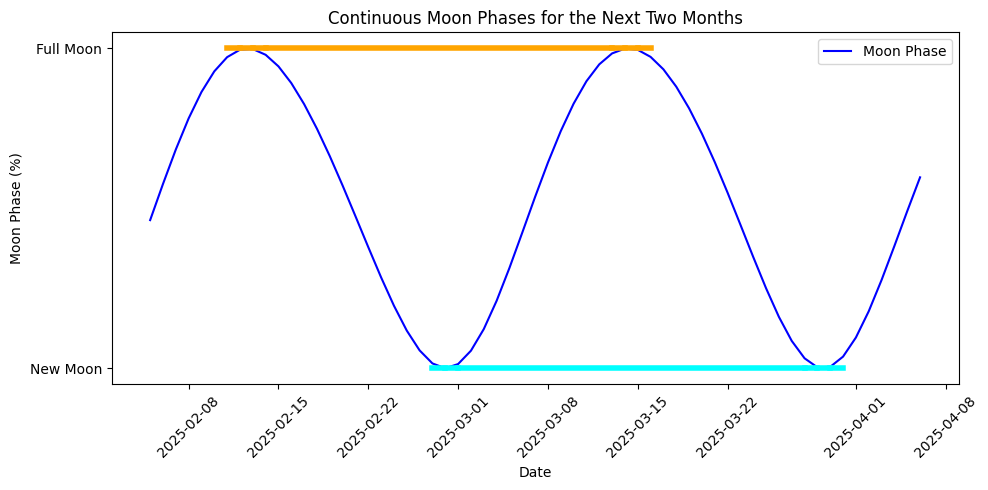

In [7]:
import ephem
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to get moon phase as a percentage using ephem
def moon_phase_percentage(date: datetime) -> float:
    """
    Returns the moon phase as a percentage (0 to 100) for a given date using ephem.
    
    Parameters:
    date (datetime): The date for which the moon phase is determined.
    
    Returns:
    float: A percentage representing the moon phase (0 - New Moon, 100 - Full Moon).
    """
    # Convert datetime to ephem date
    obs_date = ephem.Date(date)
    moon = ephem.Moon(obs_date)
    
    # Return the moon phase percentage
    return moon.phase  # Return phase as percentage (0-100)

# Function to plot Full Moon and New Moon as colored segments of the main curve
def plot_moon_phases_segments(start_date: datetime) -> None:
    """
    Plots the continuous moon phases for the next two months as a percentage, marking 
    Full Moon and New Moon with colored segments along the main curve.
    
    Parameters:
    start_date (datetime): The starting date for the moon phase generation.
    """
    end_date = start_date + timedelta(days=60)  # Next two months
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Getting moon phase values as percentages
    moon_phases = [moon_phase_percentage(date) for date in dates]
    
    # Plotting the continuous moon phase values
    plt.figure(figsize=(10, 5))
    plt.plot(dates, moon_phases, color='b', linestyle='-', marker='', label="Moon Phase")
    
    # Marking the Full Moon and New Moon with colored segments
    full_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase >= 95]  # Near Full Moon
    new_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase <= 5]  # Near New Moon
    
    # Adding colored segments for Full Moon and New Moon
    for i in range(1, len(full_moon_dates)):
        plt.plot([full_moon_dates[i-1], full_moon_dates[i]], [100, 100], color='orange', linewidth=4)
    for i in range(1, len(new_moon_dates)):
        plt.plot([new_moon_dates[i-1], new_moon_dates[i]], [0, 0], color='cyan', linewidth=4)
    
    plt.yticks([0, 100], ['New Moon', 'Full Moon'])
    plt.xlabel('Date')
    plt.ylabel('Moon Phase (%)')
    plt.title('Continuous Moon Phases for the Next Two Months')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the moon phases starting from today at midnight
plot_moon_phases_segments(datetime(2025, 2, 5))

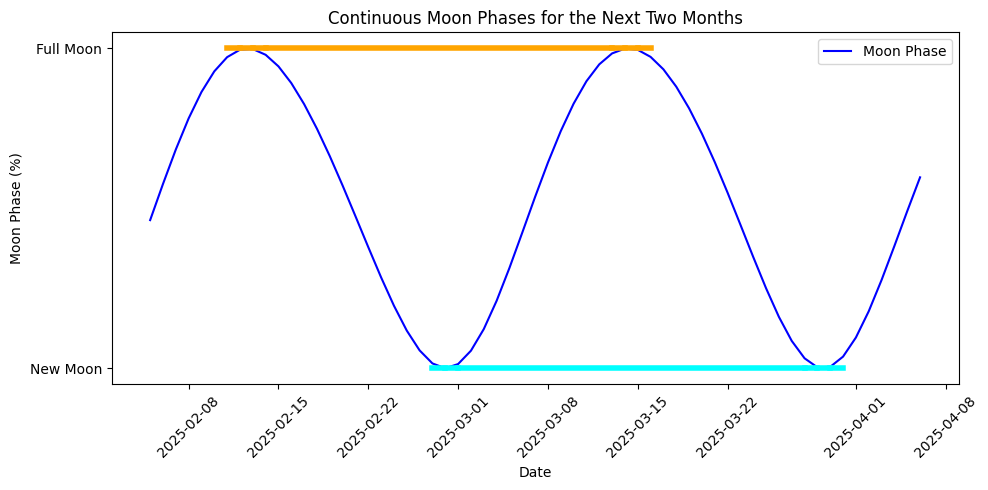

In [8]:
import ephem
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to get moon phase as a percentage using ephem
def moon_phase_percentage(date: datetime) -> float:
    """
    Returns the moon phase as a percentage (0 to 100) for a given date using ephem.
    
    Parameters:
    date (datetime): The date for which the moon phase is determined.
    
    Returns:
    float: A percentage representing the moon phase (0 - New Moon, 100 - Full Moon).
    """
    # Convert datetime to ephem date
    obs_date = ephem.Date(date)
    moon = ephem.Moon(obs_date)
    
    # Return the moon phase percentage
    return moon.phase  # Return phase as percentage (0-100)

# Function to plot Full Moon and New Moon as colored segments of the main curve
def plot_moon_phases_segments(start_date: datetime) -> None:
    """
    Plots the continuous moon phases for the next two months as a percentage, marking 
    Full Moon and New Moon with colored segments along the main curve.
    
    Parameters:
    start_date (datetime): The starting date for the moon phase generation.
    """
    end_date = start_date + timedelta(days=60)  # Next two months
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Getting moon phase values as percentages
    moon_phases = [moon_phase_percentage(date) for date in dates]
    
    # Plotting the continuous moon phase values
    plt.figure(figsize=(10, 5))
    plt.plot(dates, moon_phases, color='b', linestyle='-', marker='', label="Moon Phase")
    
    # Marking the Full Moon and New Moon with colored segments
    full_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase >= 95]  # Near Full Moon
    new_moon_dates = [dates[i] for i, phase in enumerate(moon_phases) if phase <= 5]  # Near New Moon
    
    # Adding colored segments for Full Moon and New Moon
    for i in range(1, len(full_moon_dates)):
        plt.plot([full_moon_dates[i-1], full_moon_dates[i]], [100, 100], color='orange', linewidth=4)
    for i in range(1, len(new_moon_dates)):
        plt.plot([new_moon_dates[i-1], new_moon_dates[i]], [0, 0], color='cyan', linewidth=4)
    
    plt.yticks([0, 100], ['New Moon', 'Full Moon'])
    plt.xlabel('Date')
    plt.ylabel('Moon Phase (%)')
    plt.title('Continuous Moon Phases for the Next Two Months')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the moon phases starting from today at midnight
plot_moon_phases_segments(datetime(2025, 2, 5))

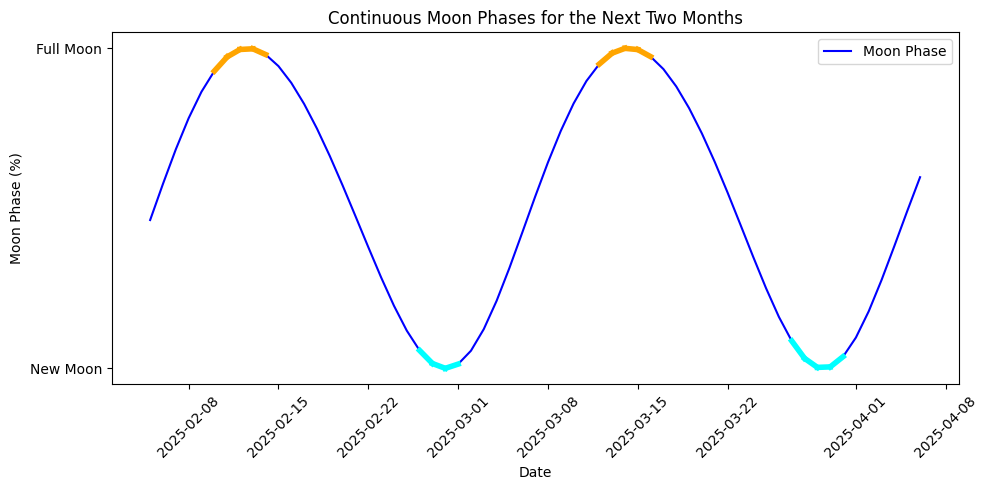

In [9]:
import ephem
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to get moon phase as a percentage using ephem
def moon_phase_percentage(date: datetime) -> float:
    """
    Returns the moon phase as a percentage (0 to 100) for a given date using ephem.
    
    Parameters:
    date (datetime): The date for which the moon phase is determined.
    
    Returns:
    float: A percentage representing the moon phase (0 - New Moon, 100 - Full Moon).
    """
    # Convert datetime to ephem date
    obs_date = ephem.Date(date)
    moon = ephem.Moon(obs_date)
    
    # Return the moon phase percentage
    return moon.phase  # Return phase as percentage (0-100)

# Function to plot Full Moon and New Moon as parts of the curve
def plot_moon_phases_curve(start_date: datetime) -> None:
    """
    Plots the continuous moon phases for the next two months as a percentage, marking 
    Full Moon and New Moon as parts of the curve.
    
    Parameters:
    start_date (datetime): The starting date for the moon phase generation.
    """
    end_date = start_date + timedelta(days=60)  # Next two months
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Getting moon phase values as percentages
    moon_phases = [moon_phase_percentage(date) for date in dates]
    
    # Plotting the continuous moon phase values
    plt.figure(figsize=(10, 5))
    plt.plot(dates, moon_phases, color='b', linestyle='-', marker='', label="Moon Phase")
    
    # Marking the Full Moon and New Moon with curve sections
    for i in range(1, len(moon_phases)):
        if moon_phases[i] >= 95:  # Full Moon (near 100%)
            plt.plot([dates[i-1], dates[i]], [moon_phases[i-1], moon_phases[i]], color='orange', linewidth=4)
        elif moon_phases[i] <= 5:  # New Moon (near 0%)
            plt.plot([dates[i-1], dates[i]], [moon_phases[i-1], moon_phases[i]], color='cyan', linewidth=4)
    
    plt.yticks([0, 100], ['New Moon', 'Full Moon'])
    plt.xlabel('Date')
    plt.ylabel('Moon Phase (%)')
    plt.title('Continuous Moon Phases for the Next Two Months')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the moon phases starting from today at midnight
plot_moon_phases_curve(datetime(2025, 2, 5))

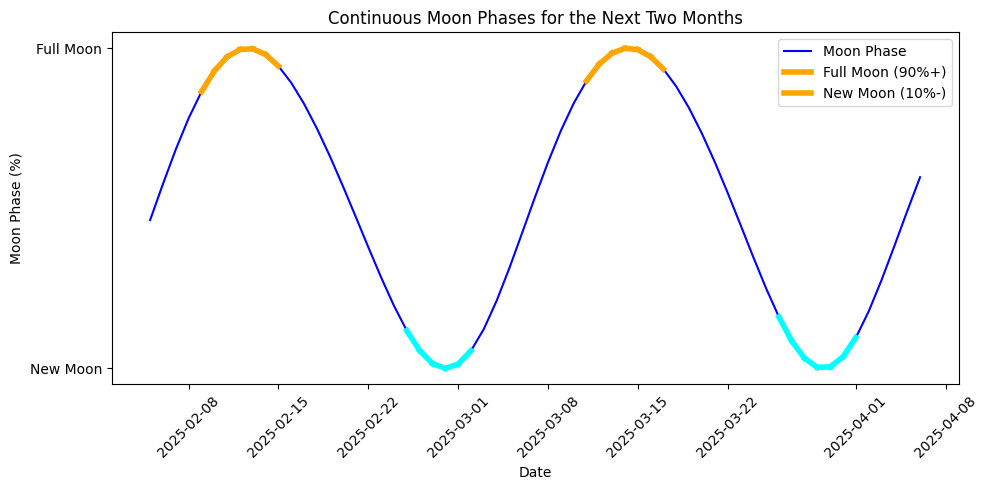

In [10]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import pandas as pd
import ephem

# Function to get moon phase as a percentage using ephem
def moon_phase(date: datetime) -> float:
    obs_date = ephem.Date(date)
    moon = ephem.Moon(obs_date)
    return moon.phase  # Return phase as percentage (0-100)

# Function to correctly match New Moon color in the legend
def plot_moon_phases_curve_legend_fixed_v2(start_date: datetime) -> None:
    """
    Plots the continuous moon phases for the next two months as a percentage, marking 
    Full Moon and New Moon as parts of the curve and adding a legend with correct color meanings.
    
    Parameters:
    start_date (datetime): The starting date for the moon phase generation.
    """
    end_date = start_date + timedelta(days=60)  # Next two months
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Getting moon phase values as percentages
    moon_phases = [moon_phase(date) for date in dates]
    
    # Plotting the continuous moon phase values
    plt.figure(figsize=(10, 5))
    plt.plot(dates, moon_phases, color='b', linestyle='-', marker='', label="Moon Phase")
    
    # Marking the Full Moon and New Moon with curve sections
    for i in range(1, len(moon_phases)):
        if moon_phases[i] >= 90:  # Full Moon (near 100%)
            plt.plot([dates[i-1], dates[i]], [moon_phases[i-1], moon_phases[i]], color='orange', linewidth=4)
        elif moon_phases[i] <= 10:  # New Moon (near 0%)
            plt.plot([dates[i-1], dates[i]], [moon_phases[i-1], moon_phases[i]], color='cyan', linewidth=4)
    
    plt.yticks([0, 100], ['New Moon', 'Full Moon'])
    plt.xlabel('Date')
    plt.ylabel('Moon Phase (%)')
    plt.title('Continuous Moon Phases for the Next Two Months')
    
    # Adding a legend for color meanings with corrected color for New Moon (cyan) and Full Moon (orange)
    plt.legend(['Moon Phase', 'Full Moon (90%+)', 'New Moon (10%-)'], loc='best')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the moon phases starting from today at midnight with corrected legend
plot_moon_phases_curve_legend_fixed_v2(datetime(2025, 2, 5))


Mėnulio fazė šįryt: 58%


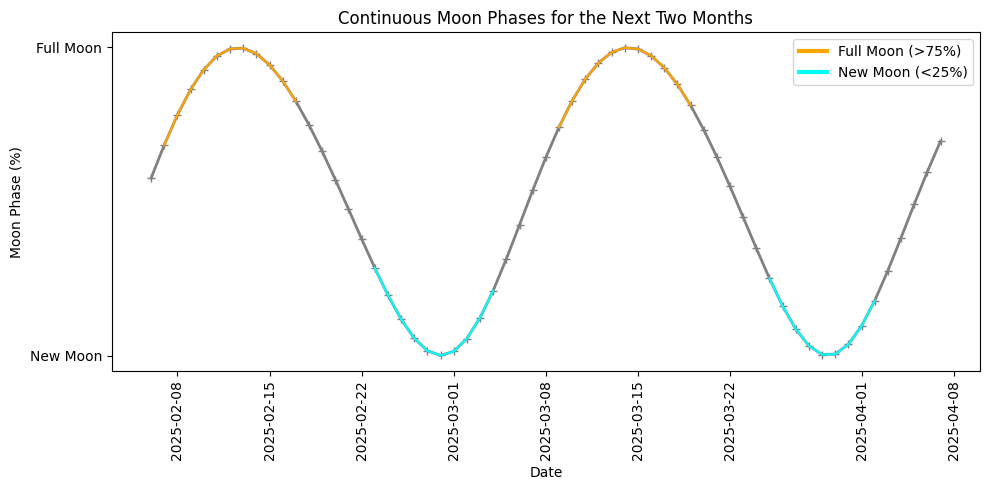

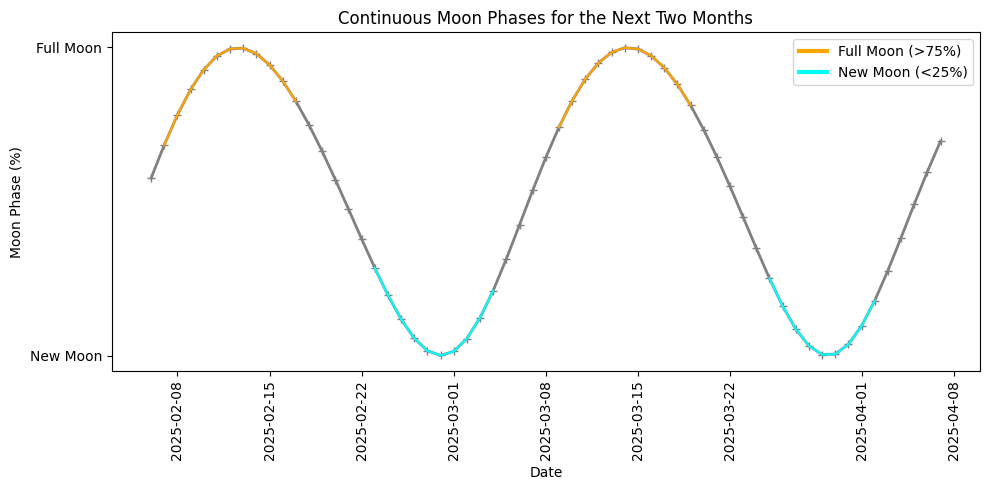

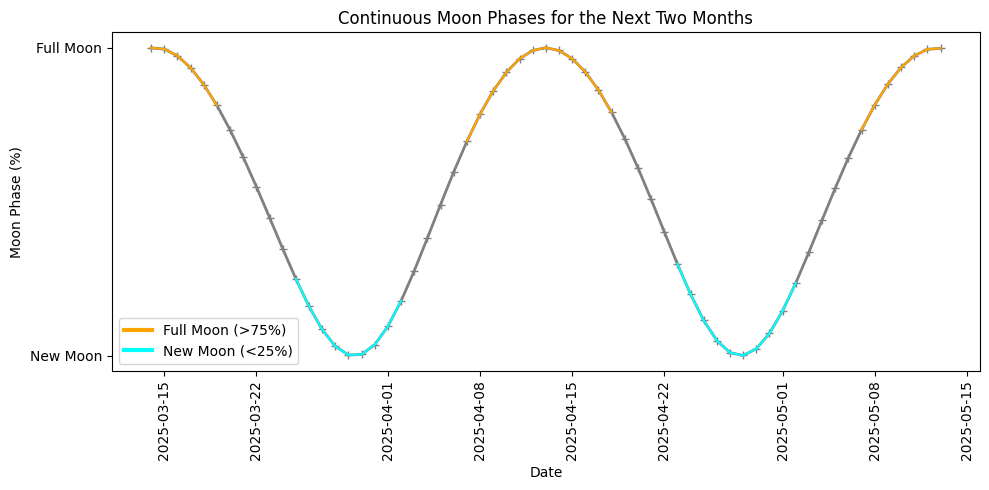

In [25]:
# Funkcija, nustatanti mėnulio fazę (%).
# Naudojama ephem biblioteka:
# pip install ephem --break-system-packages

from datetime import datetime, timedelta
import datetime as dt
import ephem

# Get moon phase as a percentage using ephem
def moon_phase(date: datetime = datetime.now().date()) -> float:
    obs_date = ephem.Date(date)
    moon = ephem.Moon(obs_date)
    return moon.phase  # Return phase as percentage (0-100)

# ______________________________
# Funkcijos moon_phase() testas:

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

def plot_moon_phases_curve(start_date: datetime = datetime.now().date()) -> None:
    end_date = start_date + timedelta(days=60)  # Next two months
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    
    # Getting moon phase values as percentages
    moon_phases = [moon_phase(date) for date in dates]
    
    # Plotting the continuous moon phase values
    plt.figure(figsize=(10, 5))
    plt.plot(dates, moon_phases, color='Gray', linestyle='-', marker='+', label="Moon Phase", lw=2)
    
    # Marking the Full Moon and New Moon with curve sections
    for i in range(1, len(moon_phases)):
        if moon_phases[i] >= 75:  # Full Moon (near 100%)
            plt.plot([dates[i-1], dates[i]], [moon_phases[i-1], moon_phases[i]], color='orange')
        elif moon_phases[i] <= 25:  # New Moon (near 0%)
            plt.plot([dates[i-1], dates[i]], [moon_phases[i-1], moon_phases[i]], color='cyan')
    
    plt.yticks([0, 100], ['New Moon', 'Full Moon'])
    plt.xlabel('Date')
    plt.ylabel('Moon Phase (%)')
    plt.title('Continuous Moon Phases for the Next Two Months')
    
    # Adding the custom legend with colors
    custom_lines = [Line2D([0], [0], color='orange', lw=3), 
                    Line2D([0], [0], color='cyan', lw=3)]
    plt.legend(custom_lines, ['Full Moon (>75%)', 'New Moon (<25%)'], loc='best')

    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.show()

print(f"Mėnulio fazė šįryt: {moon_phase():.0f}%")

# Plot the 2 months moon phases starting from today midnight
plot_moon_phases_curve()
plot_moon_phases_curve(datetime.now().date())
plot_moon_phases_curve(dt.date(2025, 3, 14))